# Importing the libraries 

In [160]:
import warnings 
import itertools
'''import itertools: This imports the Python itertools module, which provides various functions for 
working with iterators and iterable objects. In this code, itertools.product is used to generate 
combinations of parameters for the SARIMA model.'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
'''import matplotlib.pyplot as plt: This imports the pyplot module from the Matplotlib library 
and aliases it as plt. Matplotlib is a popular library for creating visualizations in Python.'''

warnings.filterwarnings("ignore")
'''warnings.filterwarnings("ignore"): This line sets the warning filter to ignore all warning messages. 
It prevents warning messages from being printed during the program's execution.'''

plt.style.use('fivethirtyeight')
'''plt.style.use('fivethirtyeight'): This line sets the style of the Matplotlib plots to use the "fivethirtyeight" 
style, which mimics the visual style of the FiveThirtyEight website.'''

import statsmodels.api as sm
'''import statsmodels.api as sm: This imports the api module from the Statsmodels library and aliases it as sm. 
Statsmodels is a library for statistical modeling and hypothesis testing in Python.'''

import matplotlib 

matplotlib.rcParams['axes.labelsize'] = 14
'''matplotlib.rcParams['axes.labelsize'] = 14: This line sets the default font size for axis labels in 
Matplotlib plots to 14.'''

matplotlib.rcParams['xtick.labelsize'] = 12
'''This line sets the default font size for x-axis tick labels in Matplotlib plots to 12.'''

matplotlib.rcParams['ytick.labelsize'] = 12
'''matplotlib.rcParams['ytick.labelsize'] = 12: This line sets the default font size for y-axis tick 
labels in Matplotlib plots to 12.'''


matplotlib.rcParams['text.color'] = 'k'
# '''This line sets the default color for text (such as labels and annotations) in Matplotlib plots to black.'''

# Time series analysis and forecasting for furniture sales


In [161]:
# reading the dataset 
df = pd.read_excel('Superstore.xls')

In [162]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [163]:
furniture = df.loc[df['Category'] == 'Furniture']
# df['Category']: This extracts the 'Category' column from the DataFrame df.
# df['Category'] == 'Furniture': This creates a boolean Series with True for rows where the 'Category' 
# column is equal to 'Furniture' and False for rows where it is not.

# df.loc[...]: This is a pandas DataFrame method that is used to select rows based on a certain condition.
# It takes a boolean Series as an argument and returns only the rows where the condition is True.

# Minimum Order date

In [164]:
furniture['Order Date'].min()

Timestamp('2014-01-06 00:00:00')

# Maximum Order Date 

In [165]:
furniture['Order Date'].max()

Timestamp('2017-12-30 00:00:00')

In [166]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')

In [167]:
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [168]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
# performs a data aggregation operation on the DataFrame furniture to group the data by the 'Order Date' column, 
# calculate the sum of the 'Sales' for each group, and then reset the index of the resulting DataFrame.


In [169]:
furniture.head()


,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939


In [170]:
furniture.tail(20)

,Order Date,Sales
869,2017-12-07,82.3800
870,2017-12-08,3368.2650
871,2017-12-09,1927.2330
872,2017-12-10,2102.2640
873,2017-12-11,1448.5290
874,2017-12-13,489.0160
875,2017-12-14,1852.5320
876,2017-12-15,22.7700
877,2017-12-16,197.7120
878,2017-12-17,629.2600


In [171]:
# Indexing with time series data 
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [200]:
y = furniture['Sales'].resample('26D').mean()

# the code takes the 'Sales' data from the furniture DataFrame, resamples it to a weekly 
# frequency (starting at the beginning of each week), and then calculates the mean sales for each week. 
# The result is stored in a new Series called y, which represents the time series data of mean weekly sales. 
# This can be useful for analyzing and visualizing the average sales pattern over time, especially 
# when dealing with time series data with irregular timestamps.

In [201]:
y['2017':]

Order Date
2017-01-02     390.183364
2017-01-28     439.283886
2017-02-23     377.026000
2017-03-21     646.847183
2017-04-16     632.352876
2017-05-12     587.395021
2017-06-07     860.733300
2017-07-03     597.759579
2017-07-29     843.460429
2017-08-24    1086.829905
2017-09-19     986.077227
2017-10-15    1057.864248
2017-11-10    1332.065160
2017-12-06    1171.578440
Freq: 26D, Name: Sales, dtype: float64

## Visualizing the sales data

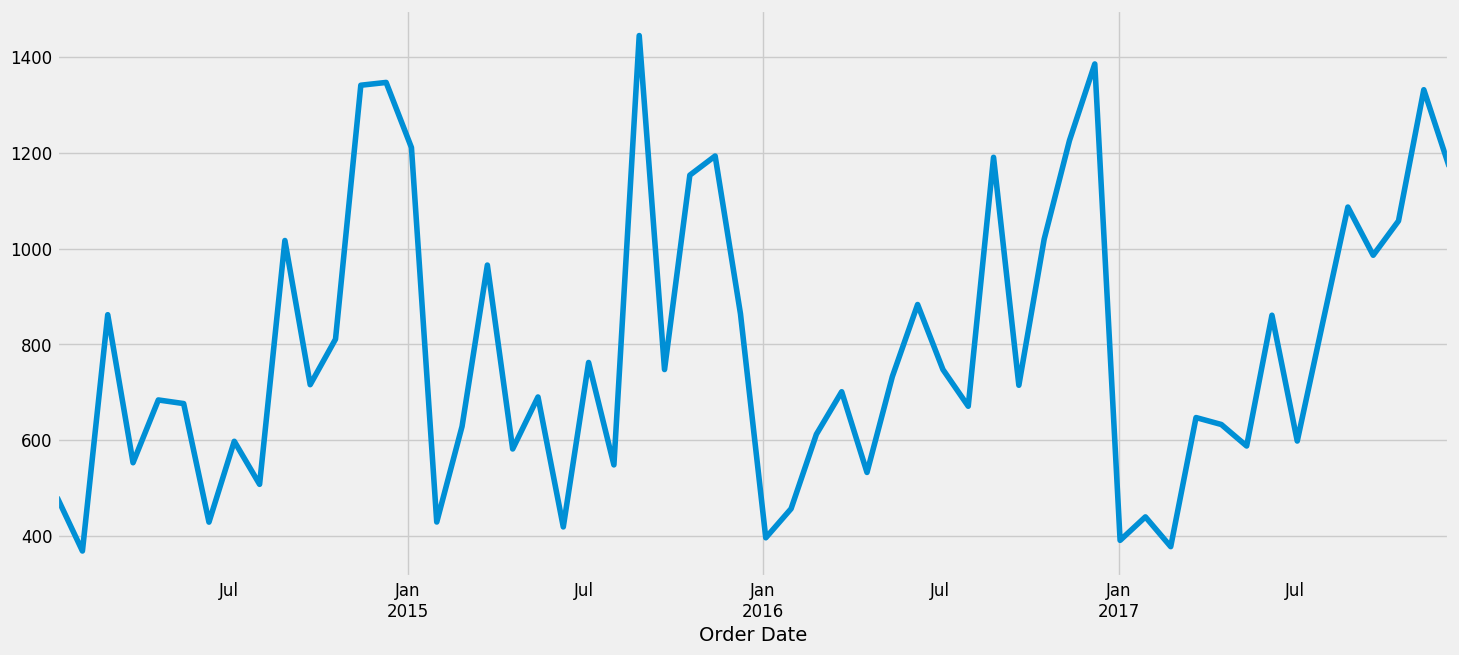

In [202]:
y.plot(figsize=(16, 7))
plt.show()

Some distinguishable patterns appear when we plot the data. The time-series has seasonality pattern, such as sales are always low at the beginning of the year and high at the end of the year. There is always a strong upward trend within any single year with a couple of low months in the mid of the year.

We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

This code performs time series decomposition using the Seasonal Decomposition of Time Series by Loess (STL) method in the statsmodels library. The process decomposes a time series y into its components: trend, seasonality, and residuals. The additive model is used here, which assumes that the original time series can be expressed as the sum of its components.

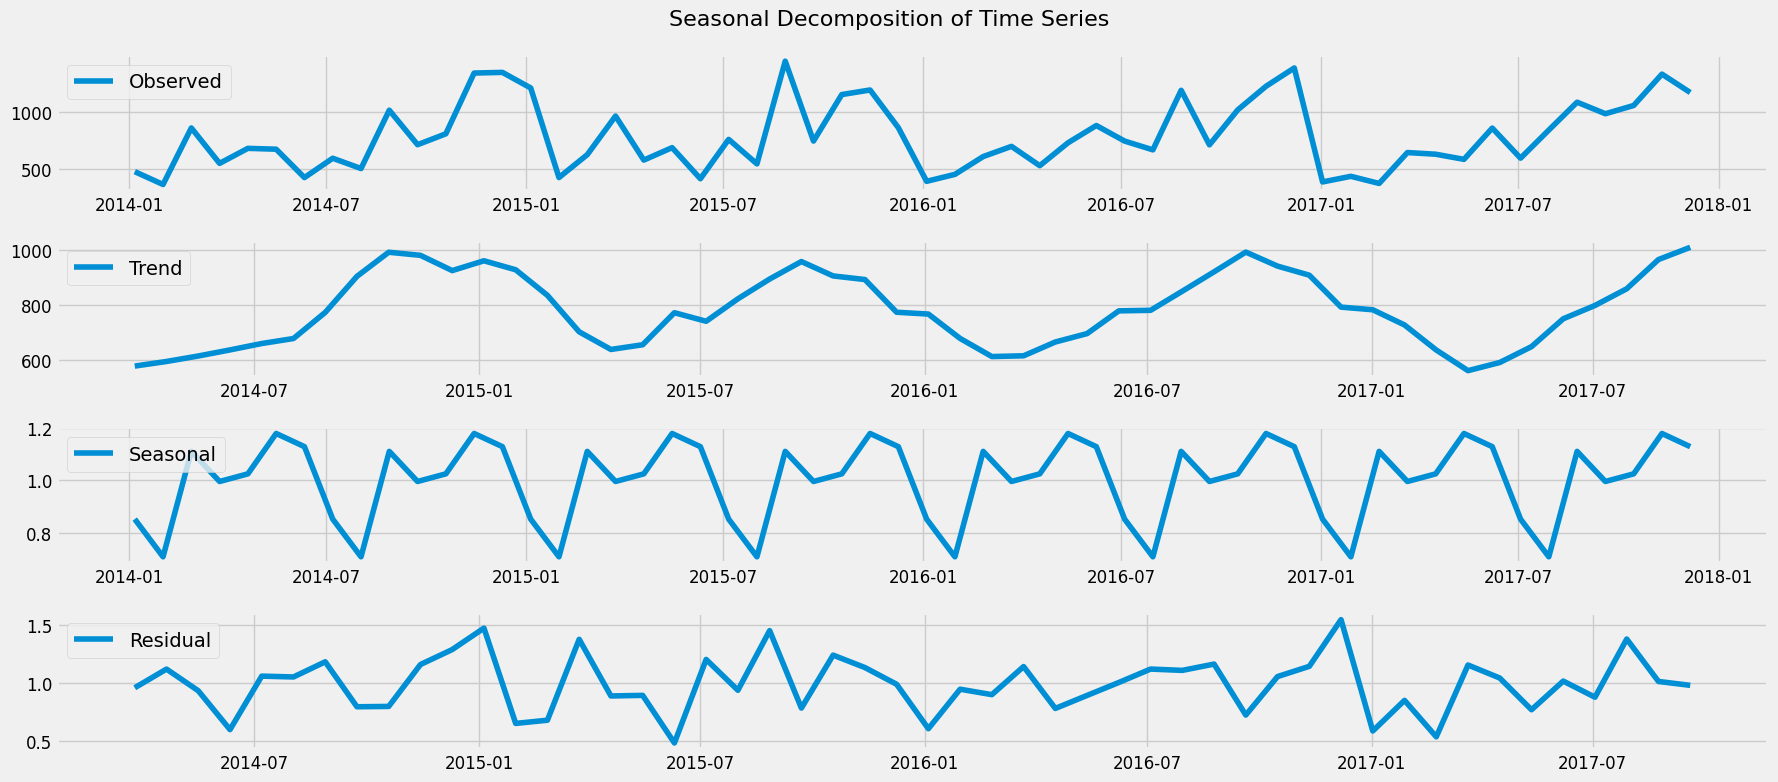

In [203]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

# Performing seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative')

# Create the decomposition plot
fig, axes = plt.subplots(4, 1, figsize=(18, 8))

# Plot the observed data
axes[0].plot(y, label='Observed')
axes[0].legend(loc='upper left')

# Plot the trend component
axes[1].plot(decomposition.trend, label='Trend')
axes[1].legend(loc='upper left')

axes[2].plot(decomposition.seasonal, label='Seasonal')
axes[2].legend(loc='upper left')


axes[3].plot(decomposition.resid, label='Residual')
axes[3].legend(loc='upper left')

# Add a title to the entire plot
fig.suptitle('Seasonal Decomposition of Time Series', fontsize=16)

# Display the plot
plt.tight_layout()
plt.show()


The plot above clearly shows that the sales of furniture is unstable, along with its obvious seasonality.

# Interactive Chart 

In [204]:
import statsmodels.api as sm
import plotly.graph_objects as go

# Assuming you have defined the 'y' time series already
# y = furniture['Sales'].resample('MS').mean()

# Perform seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(y, model='additive')

# Create an interactive plot using plotly
fig = go.Figure()

# Plot the observed data
fig.add_trace(go.Scatter(x=y.index, y=y, mode='lines', name='Observed'))

# Plot the trend component
fig.add_trace(go.Scatter(x=y.index, y=decomposition.trend, mode='lines', name='Trend'))

# Plot the seasonal component
fig.add_trace(go.Scatter(x=y.index, y=decomposition.seasonal, mode='lines', name='Seasonal'))

# Plot the residual component
fig.add_trace(go.Scatter(x=y.index, y=decomposition.resid, mode='lines', name='Residual'))

# Add a title and axis labels
fig.update_layout(title='Seasonal Decomposition of Time Series', xaxis_title='Time', yaxis_title='Values')

# Show the interactive plot
fig.show()


## Time series forecasting with ARIMA

I am going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average.


In [205]:
# Parameter Selection for the ARIMA Time Series Model
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


1. p, d, and q are assigned the same range of values using Python's range() function. The range starts at 0 and goes up to, but does not include, 2. This means the values assigned to p, d, and q will be integers from 0 to 1.
2.  the itertools.product() function is used to generate all possible combinations of the values in the p, d, and q ranges. The result is a list of tuples representing each combination.  These tuples represent all possible combinations of p, d, and q, which can be used for hyperparameter tuning or model selection in time series models like ARIMA.

3.  a new list seasonal_pdq is created using a list comprehension. The list comprehension is applied to the pdq list, which contains all possible combinations of p, d, and q that we obtained earlier using itertools.product().  the seasonal_pdq list will contain tuples that represent all possible combinations of p, d, q, and the seasonal order (fixed at 12 in this case). This is often used for hyperparameter tuning in seasonal time series models like Seasonal Autoregressive Integrated Moving Average (SARIMA), where p, d, and q represent the order of autoregressive, integrated, and moving average terms, respectively, and the seasonal order represents the periodicity of the seasonality in the data.

4. Why SARIMAX is used here:
The term "SARIMAX" stands for "Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors." It is an extension of the ARIMA model that includes additional exogenous (external) variables to improve the model's predictive power. The exogenous variables are used to account for external factors that might influence the time series.

In this code, the pdq list contains all possible combinations of orders for the ARIMA model (non-seasonal component), and the seasonal_pdq list contains all possible combinations of orders for the seasonal component of the SARIMA model. By considering these combinations, you can iteratively test and select the best SARIMA model for your time series data. The choice of the best SARIMA model depends on various factors, including model evaluation metrics, domain knowledge, and how well the model fits the historical data.

In [206]:
# for param in pdq:
#     for param_seasonal in seasonal_pdq:
#         try:
#             mod = sm.tsa.statespace.SARIMAX(y,
#                                             order=param,
#                                             seasonal_order=param_seasonal,
#                                             enforce_stationarity=False,
#                                             enforce_invertibility=False)

#             results = mod.fit()

#             print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
#         except:
#             continue




best_aic = float('inf')
best_params = None
best_seasonal_params = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

            # Check if this model has the smallest AIC
            if results.aic < best_aic:
                best_aic = results.aic
                best_params = param
                best_seasonal_params = param_seasonal
        except:
            continue

print("Smallest AIC: {}".format(best_aic))
print("Best Model: ARIMA{}x{}12".format(best_params, best_seasonal_params))

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:900.1849744402481
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:681.1135336220995
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:641.7113740593056


ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1506.8066031635058
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:661.1848346731841
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:637.1645021936384
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:471.15404594069435
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1402.2392100128898
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:847.4197679620313
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:645.3708818738432
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:622.6989827038408
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1149.144708312073
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:658.3501931029077
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:616.7420539709677
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:470.81379838822045
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1295.4537601867196
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:785.5153531820312
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:615.6524079485408
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:646.5433299505796
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1071.9895487771632
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:629.5014506240434
ARIM

By iterating through all possible combinations of non-seasonal and seasonal orders and fitting the SARIMA models, this grid search approach helps identify the best-fitting SARIMA model for the given time series data y. The model with the lowest AIC value is typically chosen as the optimal model for forecasting or further analysis.

In [210]:
mod = sm.tsa.statespace.SARIMAX(y,
                                
                                order=(0,1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5240      0.192     -2.728      0.006      -0.900      -0.148
ar.S.L12      -0.1297      0.171     -0.760      0.447      -0.464       0.205
ma.S.L12      -1.0018      0.374     -2.682      0.007      -1.734      -0.270
sigma2      9.071e+04   4.11e-06   2.21e+10      0.000    9.07e+04    9.07e+04


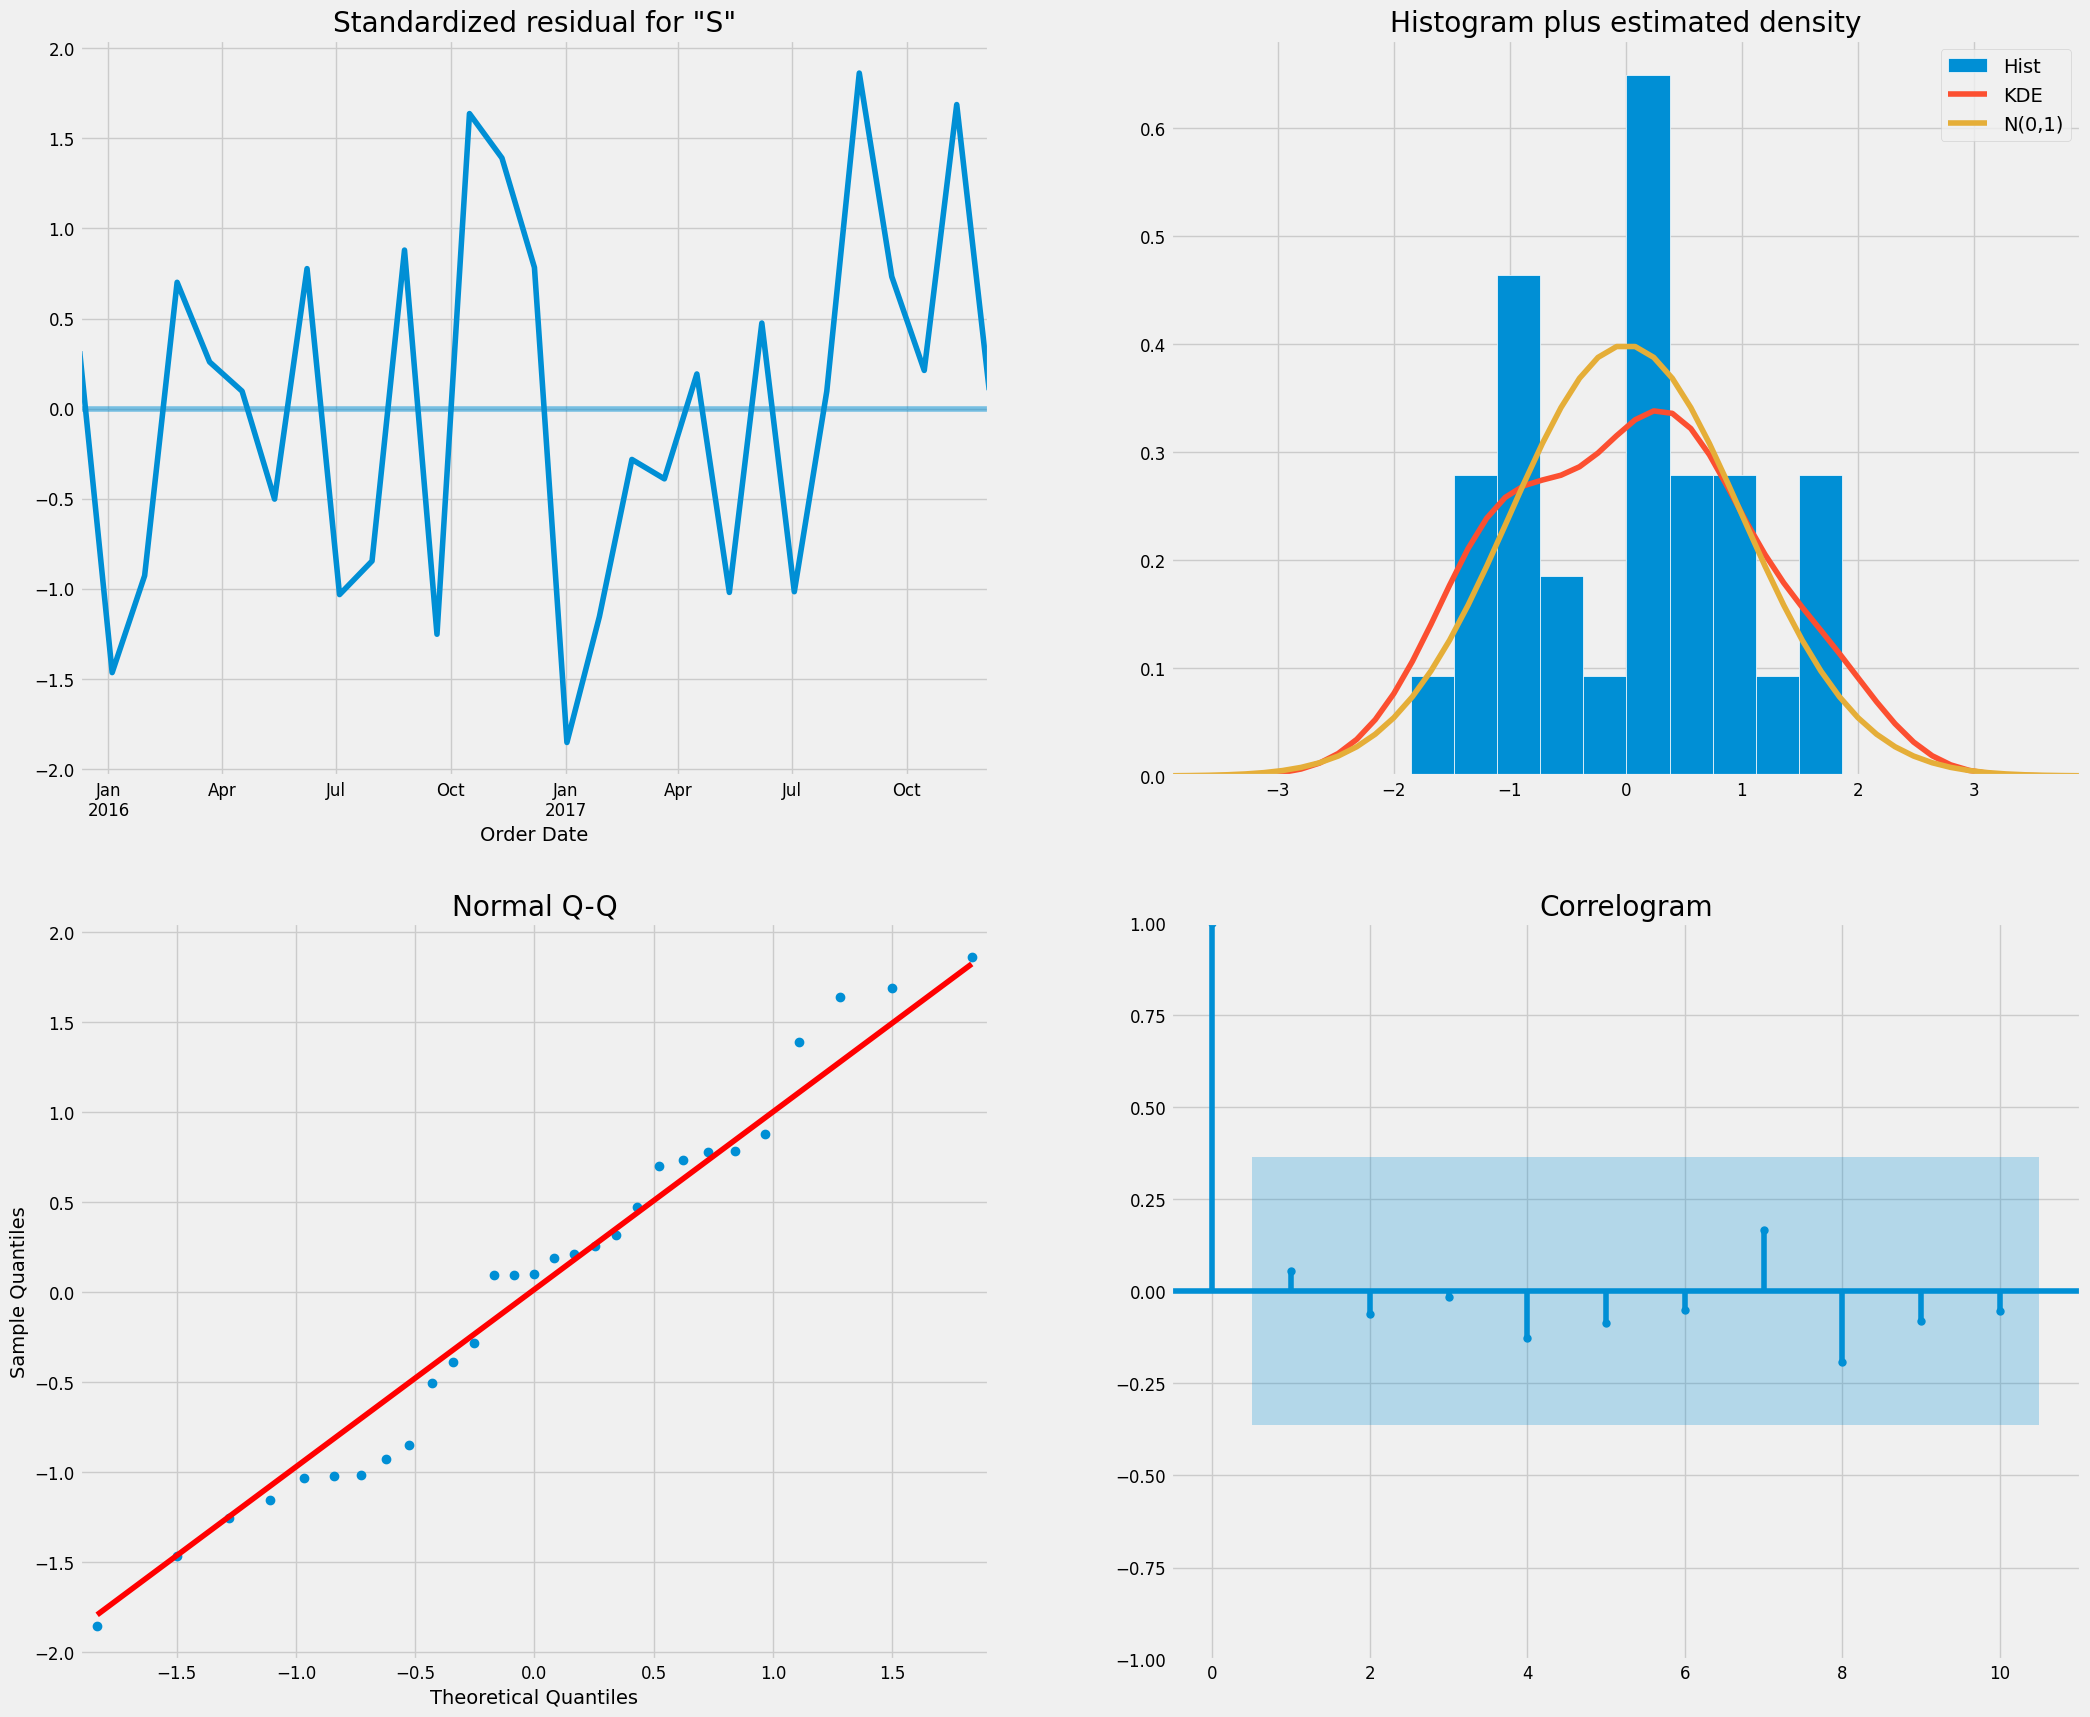

In [211]:
# plotting 
results.plot_diagnostics(figsize=(23, 20))
plt.show()

## Validating forecasts
To help us understand the accuracy of our forecasts, we compare predicted sales to real sales of the time series, and we set forecasts to start at 2017-07-01 to the end of the data.

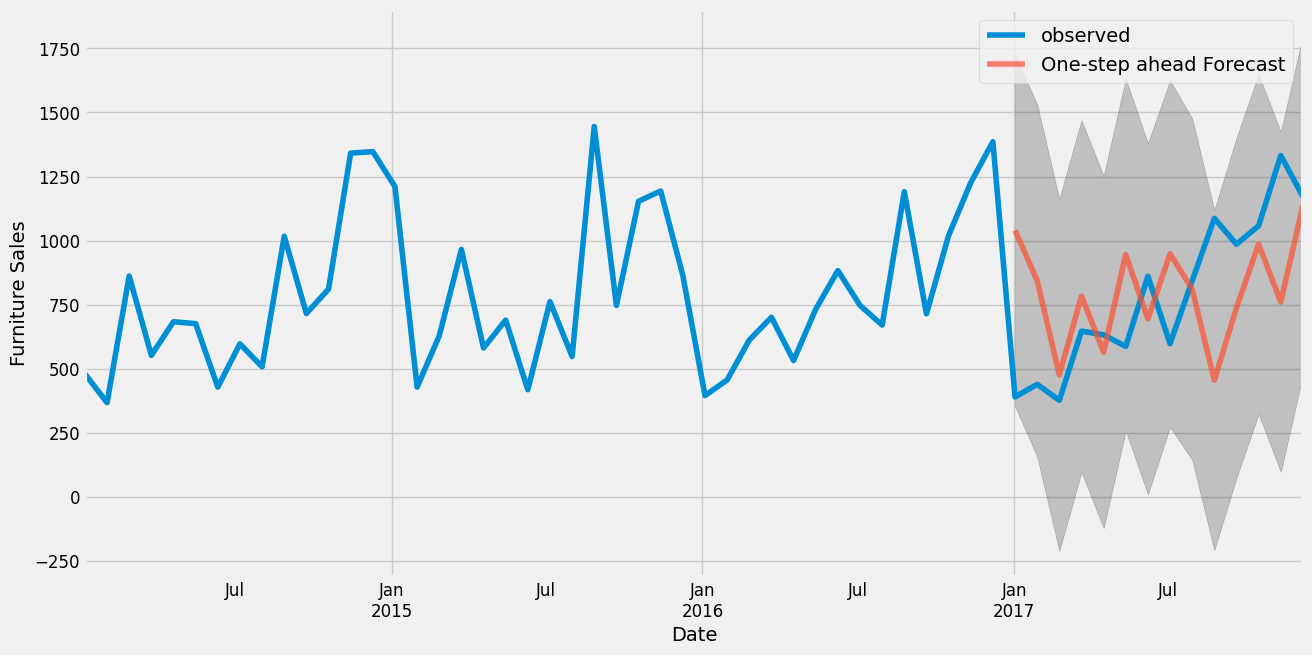

In [213]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-02'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()

plt.show()

The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing an upward trend starts from the beginning of the year.

In [214]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-10':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 97630.82


In [215]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 312.46


In statistics, the mean squared error (MSE) of an estimator measures the average of the squares of the errors — that is, the average squared difference between the estimated values and what is estimated. The MSE is a measure of the quality of an estimator—it is always non-negative, and the smaller the MSE, the closer we are to finding the line of best fit.

Root Mean Square Error (RMSE) tells us that our model was able to forecast the average daily furniture sales in the test set within 151.64 of the real sales. Our furniture daily sales range from around 400 to over 1200. In my opinion, this is a pretty good model so far.

## Producing and visualizing forecasts

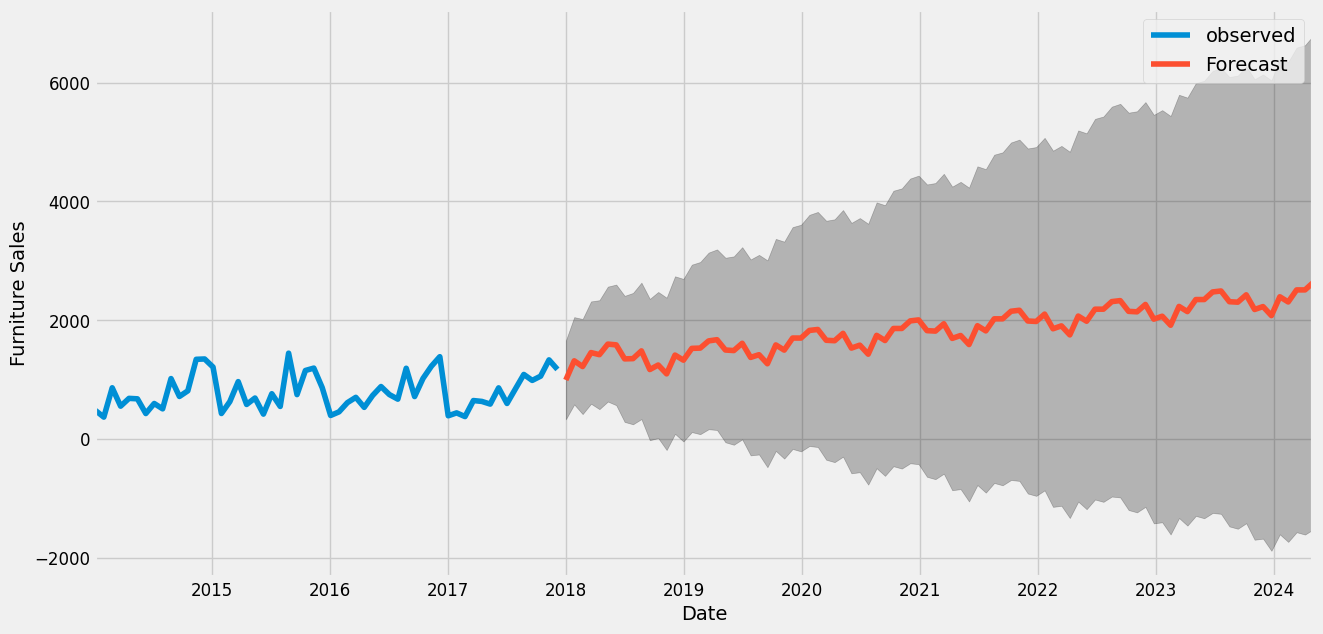

In [216]:
pred_uc = results.get_forecast(steps=90)
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()

Our model clearly captured furniture sales seasonality. As we forecast further out into the future, it is natural for us to become less confident in our values. This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.

